In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('C:\\Users\\EXCELL  COMPUTERS\\Programming_Data_Science\\CSV_Files\\Titanic.csv',
                usecols=['Age','Fare','Survived'])

In [3]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
x_train.head(2)

,Age,Fare
816,23.000000,7.925
557,29.699118,227.525


C:\Users\EXCELL  COMPUTERS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


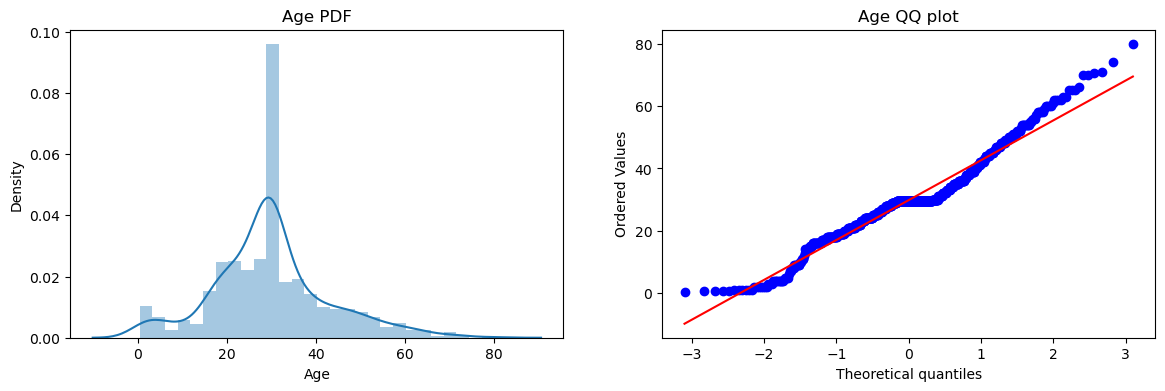

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist= 'norm', plot = plt)
plt.title('Age QQ plot')
plt.show()


C:\Users\EXCELL  COMPUTERS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


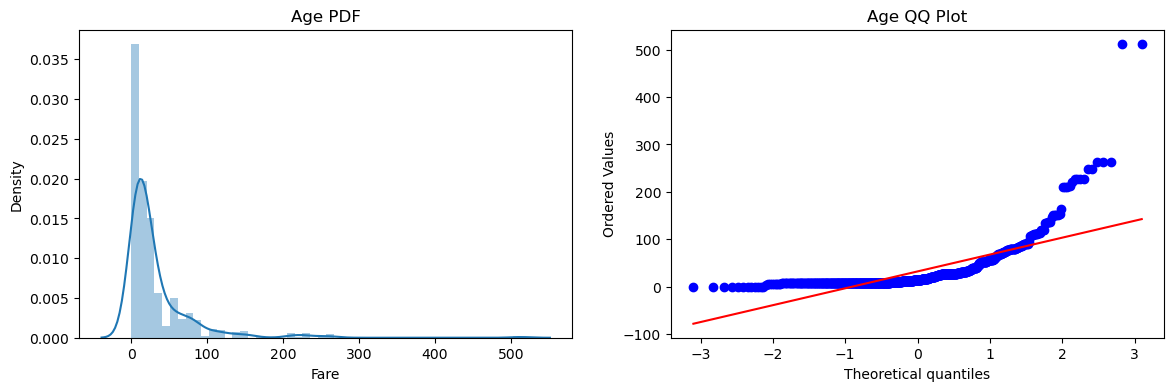

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [12]:
trf1 = ColumnTransformer([
    ('x_train_transformer',FunctionTransformer(func=np.log1p),slice(0,2))
],remainder='passthrough')

In [13]:
trf2 = LogisticRegression()

In [14]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [15]:
from sklearn import set_config
set_config(display='diagram')

In [16]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('x_train_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  slice(0, 2, None))])),
                ('trf2', LogisticRegression())])

In [17]:
y_pred = pipe.predict(x_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)

0.6480446927374302

In [20]:
transformer = FunctionTransformer(func=np.log1p)

In [21]:
x_transformer = transformer.fit_transform(x)

In [22]:
x_transformer.shape

(891, 2)

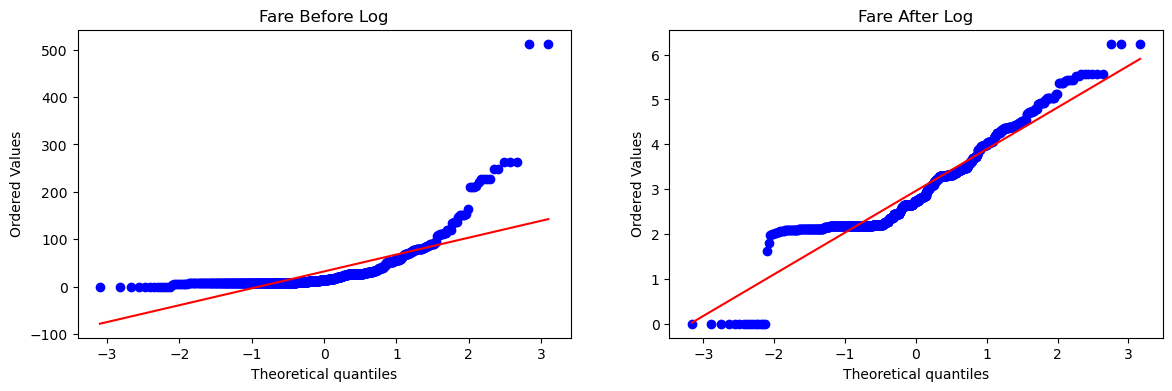

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_transformer['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

In [4]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the Titanic dataset
#url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv("C:\\Users\\EXCELL  COMPUTERS\\Programming_Data_Science\\CSV_Files\\Titanic.csv")

In [5]:
# Drop irrelevant columns
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Split the data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom transformer for extracting family size
class FamilySizeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
        return X[['FamilySize']]

# Custom transformer for extracting title
class TitleExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        X['Title'] = X['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        X['Title'] = X['Title'].replace('Mlle', 'Miss')
        X['Title'] = X['Title'].replace('Ms', 'Miss')
        X['Title'] = X['Title'].replace('Mme', 'Mrs')
        return X[['Title']]

# Custom transformer for selecting specific columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]


In [11]:
# Create a pipeline with multiple transformers and different boosting classifiers
pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('selector', ColumnSelector(columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])),
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), make_column_selector(dtype_include=np.number)),
            ('cat', Pipeline([
                ('selector', ColumnSelector(columns=['Sex', 'Embarked'])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), make_column_selector(dtype_include=object))
        ], 
        remainder='passthrough'
    )),
    ('classifier', XGBClassifier())
])


In [20]:
pipeline_lgbm = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('selector', ColumnSelector(columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])),
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), make_column_selector(dtype_include=np.number)),
            ('cat', Pipeline([
                ('selector', ColumnSelector(columns=['Sex', 'Embarked'])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), make_column_selector(dtype_include=object))
        ], 
        remainder='passthrough'
    )),
    ('classifier', LGBMClassifier())
])

In [19]:
pipeline_catboost = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('selector', ColumnSelector(columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])),
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), make_column_selector(dtype_include=np.number)),
            ('cat', Pipeline([
                ('selector', ColumnSelector(columns=['Sex', 'Embarked'])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), make_column_selector(dtype_include=object))
        ], 
        remainder='passthrough'
    )),
    ('classifier', CatBoostClassifier())
])

In [7]:
# Define hyperparameter grids for each classifier
param_grid_xgb = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'preprocessor__num__scaler__with_std': [True, False],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

In [12]:
# Hyperparameter tuning using GridSearchCV for each classifier
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=5)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('selector',
                                                                                          ColumnSelector(columns=['Pclass',
                                                                                                                  'Age',
                                                                                                                  'SibSp',
                                                                                                                  'Parch',
                                                                                                                  'Fare'])),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002442...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200],
                         'preprocessor__num__scaler__with_mean': [True, False],
                         'preprocessor__num__scaler__with_std': [True, False]},
             scoring='accuracy')

In [13]:
param_grid_lgbm = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'preprocessor__num__scaler__with_std': [True, False],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}


In [14]:

param_grid_catboost = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'preprocessor__num__scaler__with_std': [True, False],
    'classifier__iterations': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__depth': [3, 4, 5]
}

In [21]:
grid_search_lgbm = GridSearchCV(estimator=pipeline_lgbm, param_grid=param_grid_lgbm, scoring='accuracy', cv=5)
grid_search_lgbm.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('selector',
                                                                                          ColumnSelector(columns=['Pclass',
                                                                                                                  'Age',
                                                                                                                  'SibSp',
                                                                                                                  'Parch',
                                                                                                                  'Fare'])),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002442...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002442DE95F40>)])),
                                       ('classifier', LGBMClassifier())]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200],
                         'preprocessor__num__scaler__with_mean': [True, False],
                         'preprocessor__num__scaler__with_std': [True, False]},
             scoring='accuracy')

In [22]:
grid_search_catboost = GridSearchCV(estimator=pipeline_catboost, param_grid=param_grid_catboost, scoring='accuracy', cv=5)
grid_search_catboost.fit(X_train, y_train)

0:	learn: 0.6892185	total: 159ms	remaining: 7.81s
1:	learn: 0.6854729	total: 161ms	remaining: 3.85s
2:	learn: 0.6816884	total: 161ms	remaining: 2.53s
3:	learn: 0.6780329	total: 162ms	remaining: 1.86s
4:	learn: 0.6749608	total: 163ms	remaining: 1.46s
5:	learn: 0.6713605	total: 163ms	remaining: 1.2s
6:	learn: 0.6678172	total: 164ms	remaining: 1.01s
7:	learn: 0.6644829	total: 165ms	remaining: 864ms
8:	learn: 0.6611931	total: 165ms	remaining: 753ms
9:	learn: 0.6583919	total: 166ms	remaining: 664ms
10:	learn: 0.6551439	total: 167ms	remaining: 591ms
11:	learn: 0.6519193	total: 167ms	remaining: 530ms
12:	learn: 0.6489245	total: 168ms	remaining: 478ms
13:	learn: 0.6458179	total: 169ms	remaining: 434ms
14:	learn: 0.6433341	total: 170ms	remaining: 396ms
15:	learn: 0.6403952	total: 170ms	remaining: 362ms
16:	learn: 0.6380419	total: 171ms	remaining: 332ms
17:	learn: 0.6355195	total: 172ms	remaining: 305ms
18:	learn: 0.6325758	total: 172ms	remaining: 281ms
19:	learn: 0.6301431	total: 173ms	remainin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('selector',
                                                                                          ColumnSelector(columns=['Pclass',
                                                                                                                  'Age',
                                                                                                                  'SibSp',
                                                                                                                  'Parch',
                                                                                                                  'Fare'])),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002442...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002442DE308B0>)])),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x000002442DE30DF0>)]),
             param_grid={'classifier__depth': [3, 4, 5],
                         'classifier__iterations': [50, 100, 200],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'preprocessor__num__scaler__with_mean': [True, False],
                         'preprocessor__num__scaler__with_std': [True, False]},
             scoring='accuracy')

In [26]:
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_


In [27]:
best_params_lgbm = grid_search_lgbm.best_params_
best_model_lgbm = grid_search_lgbm.best_estimator_

In [28]:
best_params_catboost = grid_search_catboost.best_params_
best_model_catboost = grid_search_catboost.best_estimator_

# Make predictions on the test set for each classifier
predictions_xgb = best_model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predictions_xgb)

predictions_lgbm = best_model_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, predictions_lgbm)

predictions_catboost = best_model_catboost.predict(X_test)
accuracy_catboost = accuracy_score(y_test, predictions_catboost)

print("XGBoost:")
print(f"Best Hyperparameters: {best_params_xgb}")
print(f"Accuracy on Test Set: {accuracy_xgb}")
print("\n")

print("LightGBM:")
print(f"Best Hyperparameters: {best_params_lgbm}")
print(f"Accuracy on Test Set: {accuracy_lgbm}")
print("\n")

print("CatBoost:")
print(f"Best Hyperparameters: {best_params_catboost}")
print(f"Accuracy on Test Set: {accuracy_catboost}")


XGBoost:
Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'preprocessor__num__scaler__with_mean': True, 'preprocessor__num__scaler__with_std': False}
Accuracy on Test Set: 0.8100558659217877


LightGBM:
Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'preprocessor__num__scaler__with_mean': True, 'preprocessor__num__scaler__with_std': True}
Accuracy on Test Set: 0.8100558659217877


CatBoost:
Best Hyperparameters: {'classifier__depth': 3, 'classifier__iterations': 100, 'classifier__learning_rate': 0.2, 'preprocessor__num__scaler__with_mean': True, 'preprocessor__num__scaler__with_std': True}
Accuracy on Test Set: 0.8044692737430168


# Pipeline with Hypothesis Testing

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming x and y are your feature and target matrices
# Replace this with your actual data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Custom transformer for hypothesis testing and column selection
class HypothesisTestingSelector(BaseEstimator, TransformerMixin):
    def __init__(self, significance_threshold=0.05):
        self.significance_threshold = significance_threshold
        self.selected_columns = None

    def fit(self, X, y=None):
        columns = []
        p_values = []

        for column in X.columns:
            x_selected = X[column]
            x_selected = sm.add_constant(x_selected)
            model = sm.OLS(y, x_selected).fit()
            p_value = model.pvalues[column]
            columns.append(column)
            p_values.append(p_value)

        # Select columns based on the significance threshold
        self.selected_columns = [col for col, p_value in zip(columns, p_values) if p_value < self.significance_threshold]
        return self

    def transform(self, X):
        return X[self.selected_columns]

# Define the rest of your pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('cat', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
        # Add more transformers as needed
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('selector', HypothesisTestingSelector()),
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Set: {accuracy}")

# Visualize selected features and their p-values
selector = pipeline.named_steps['selector']
selected_columns = selector.selected_columns
p_values = [p_value for col, p_value in zip(x.columns, selector.p_values) if col in selected_columns]

plt.figure(figsize=(14, 8))
bars = plt.barh(selected_columns, p_values, color='skyblue')
plt.xlabel('P-Value')
plt.title('P-Values for Selected Columns')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add p-value labels to the bar lines
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{p_value:.4f}', ha='left', va='center')

# Highlight significant features with a different color
significant_color = 'coral'
threshold = selector.significance_threshold
for bar, p_value in zip(bars, p_values):
    if p_value < threshold:
        bar.set_color(significant_color)

plt.show()


# This is for both categorical as well as for numerical 

In [ ]:
class HypothesisTestingSelector(BaseEstimator, TransformerMixin):
    def __init__(self, significance_threshold=0.05):
        self.significance_threshold = significance_threshold
        self.selected_columns = None

    def fit(self, X, y=None):
        numeric_columns = make_column_selector(dtype_include=np.number)(X)
        categorical_columns = make_column_selector(dtype_include=object)(X)

        columns = []
        p_values = []

        # Hypothesis testing for numeric columns
        for column in numeric_columns:
            x_selected = X[column]
            x_selected = sm.add_constant(x_selected)
            model = sm.OLS(y, x_selected).fit()
            p_value = model.pvalues[column]
            columns.append(column)
            p_values.append(p_value)

        # Hypothesis testing for categorical columns
        for column in categorical_columns:
            x_selected = pd.get_dummies(X[column], drop_first=True)
            x_selected = sm.add_constant(x_selected)
            model = sm.OLS(y, x_selected).fit()
            p_value = model.pvalues[column]
            columns.append(column)
            p_values.append(p_value)

        # Select columns based on the significance threshold
        self.selected_columns = [col for col, p_value in zip(columns, p_values) if p_value < self.significance_threshold]
        return self

    def transform(self, X):
        return X[self.selected_columns]

# Define the rest of your pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), make_column_selector(dtype_include=np.number)),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), make_column_selector(dtype_include=object)),
        # Add more transformers as needed
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('selector', HypothesisTestingSelector()),
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Set: {accuracy}")

# Visualize selected features and their p-values
selector = pipeline.named_steps['selector']
selected_columns = selector.selected_columns
p_values = [p_value for col, p_value in zip(x.columns, selector.p_values) if col in selected_columns]

plt.figure(figsize=(14, 8))
bars = plt.barh(selected_columns, p_values, color='skyblue')
plt.xlabel('P-Value')
plt.title('P-Values for Selected Columns')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add p-value labels to the bar lines
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{p_value:.4f}', ha='left', va='center')

# Highlight significant features with a different color
significant_color = 'coral'
threshold = selector.significance_threshold
for bar, p_value in zip(bars, p_values):
    if p_value < threshold:
        bar.set_color(significant_color)

plt.show()

# Feature Selection Technique instead of Hypothesis Testing

In [ ]:
#Recursive Feature Elimination (RFE):
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit_transform(X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
feature_importance = result.importances_mean


In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Target'].abs().sort_values(ascending=False)
selected_features = correlation_with_target.index[:10].tolist()
